In [1]:
%matplotlib inline

#import all the modules
import sqlite3
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, f1_score, make_scorer
from sklearn import metrics
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
conn2=sqlite3.connect('D:/Applied AI Course/final.sqlite')

In [3]:
label_df=pd.read_sql_query("""SELECT * FROM REVIEWS""",conn2)

In [4]:
label_df.head(4)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,Positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,Positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,Positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,Positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...


In [5]:
label_df=label_df.sort_values('Time',axis=0,inplace=False,kind='quicksort')

In [6]:
d_pos=label_df[label_df["Score"] == 'Positive'].sample(n=50000)
d_neg=label_df[label_df["Score"] == 'Negative'].sample(n=50000)
finald=pd.concat([d_pos,d_neg])
finald.shape

(100000, 12)

In [7]:
finald.head(2)
final_d=finald.sort_values(by='Time')
final_d.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,Positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
308,346041,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,Negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
868,138017,149789,B00004S1C6,A1KXONFPU2XQ5K,Stephanie Manley,26,28,Positive,965779200,A must have!,"These are easy to use, they do not make a mess...",easi use make mess offer vibrant color taint d...


# BagOfWords 

In [8]:
X=final_d["CleanedText"]
X.shape

(100000,)

In [9]:
y=final_d["Score"]
y.shape

(100000,)

In [10]:
#split the data into train and test fo bag of words

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=None,shuffle=False)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=train_test_split(X_train,Y_train,test_size=0.3,shuffle=False)

In [11]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(70000,) (30000,) (70000,) (30000,)


In [12]:
#Bag of Words
BoW=CountVectorizer()
X_train=BoW.fit_transform(X_train)
#X_train=StandardScaler(with_mean=False).fit_transform(X_train)
x_test=BoW.transform(X_test)

In [13]:
from sklearn import preprocessing
X_train=preprocessing.normalize(X_train)
X_test=preprocessing.normalize(x_test)

print(X_train.shape, X_test.shape)

(70000, 44575) (30000, 44575)


In [14]:
#X_train=StandardScaler(with_mean=False).fit_transform(X_train)
#X_test=StandardScaler(with_mean=False).fit(X_train).transform(x_test)

In [15]:
print(X_train.shape,X_test.shape)

(70000, 44575) (30000, 44575)


In [16]:
from sklearn.model_selection import TimeSeriesSplit

tcv=TimeSeriesSplit(n_splits=10)
for train,cv in tcv.split(X_train):
    print(X_train[train].shape,X_train[cv].shape)

(6370, 44575) (6363, 44575)
(12733, 44575) (6363, 44575)
(19096, 44575) (6363, 44575)
(25459, 44575) (6363, 44575)
(31822, 44575) (6363, 44575)
(38185, 44575) (6363, 44575)
(44548, 44575) (6363, 44575)
(50911, 44575) (6363, 44575)
(57274, 44575) (6363, 44575)
(63637, 44575) (6363, 44575)


## Find the best hyperparameter C or 1/Lambda and regulariser[L1,L2] using cross validation 

In [17]:
import pickle
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"))


In [18]:
def openfromfile(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

# GridSearch Cross validation

In [19]:
cls=LogisticRegression()
param_grid={'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.00001],
           'penalty':['l1','l2']}
tcv=TimeSeriesSplit(n_splits=10)
gcv=GridSearchCV(cls,param_grid,cv=tcv,verbose=1)
gcv.fit(X_train,Y_train)
savetofile(gcv,"D:/Applied AI Course/gcv_uni")
print("Best HyperParameter: ",gcv.best_params_)
print("Best Accuracy: %.2f%%"%(gcv.best_score_*100))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 10.4min finished


Best HyperParameter:  {'C': 5, 'penalty': 'l2'}
Best Accuracy: 86.88%


In [20]:
savetofile(gcv,"D:/Applied AI Course/gcv_uni")

In [21]:
import matplotlib.pyplot as plt

In [22]:
 def plot_error_vs_c(gcv):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for a in gcv.grid_scores_:
        if (a[0]['penalty']) =='l1':
            y1.append(1-a[1])
            x1.append(a[0]['C'])
        else:
            y2.append(1-a[1])
            x2.append(a[0]['C'])
    plt.xlim(5,1010)
    plt.ylim(0,0.5)
    plt.xlabel("C",fontsize=15)
    plt.ylabel("Misclassification Error")
    plt.title('Misclassification Error v/s C')
    plt.plot(x1,y1,'b',label="L1")
    plt.plot(x2,y2,'r',label="L2")
    plt.legend()
    plt.show()




    

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


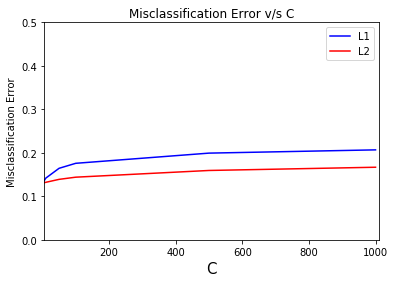

In [23]:
gcv = openfromfile("D:/Applied AI Course/gcv_uni")
plot_error_vs_c(gcv)

In [25]:
clf=LogisticRegression(C=5,penalty='l2')
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
training_accuracy = clf.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, y_pred)
test_error = 1 - test_accuracy

Accuracy on test set: 87.837%
Non Zero weights: 44575


# sparsity increase with change in C and lambda hyperparameters

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 1000, penalty= 'l1')
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
precision_scorer = make_scorer(precision_score, pos_label='Positive')
recall_scorer=make_scorer(recall_score, pos_label='Positive')
precision = cross_val_score(clf, X_train, Y_train, cv=3, scoring=precision_scorer)
recall=cross_val_score(clf, X_train, Y_train, cv=3, scoring=recall_scorer)
precision=np.mean(precision)
recall=np.mean(recall)
f1_score= 2 * (precision * recall) / (precision + recall)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, prediction)*100))
print("F1-Score on test set: %0.3f%%"%(f1_score * 100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 81.333%
F1-Score on test set: 80.036%
Non Zero weights: 22543


In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 1000, penalty= 'l1')
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
precision_scorer = make_scorer(precision_score, pos_label='Negative')
recall_scorer=make_scorer(recall_score, pos_label='Negative')
precision = cross_val_score(clf, X_train, Y_train, cv=3, scoring=precision_scorer)
recall=cross_val_score(clf, X_train, Y_train, cv=3, scoring=recall_scorer)
precision=np.mean(precision)
recall=np.mean(recall)
f1_score= 2 * (precision * recall) / (precision + recall)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, prediction)*100))
print("F1-Score on test set: %0.3f%%"%(f1_score * 100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 81.327%
F1-Score on test set: 78.768%
Non Zero weights: 22541


In [28]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 100, penalty= 'l1')
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
precision_scorer = make_scorer(precision_score, pos_label='Positive')
recall_scorer=make_scorer(recall_score, pos_label='Positive')
precision = cross_val_score(clf, X_train, Y_train, cv=3, scoring=precision_scorer)
recall=cross_val_score(clf, X_train, Y_train, cv=3, scoring=recall_scorer)
precision=np.mean(precision)
recall=np.mean(recall)
f1_score= 2 * (precision * recall) / (precision + recall)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, prediction)*100))
print("F1-Score on test set: %0.3f"%(f1_score * 100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 84.067%
F1-Score on test set: 83.877
Non Zero weights: 16687


In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 100, penalty= 'l1')
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
precision_scorer = make_scorer(precision_score, pos_label='Negative')
recall_scorer=make_scorer(recall_score, pos_label='Negative')
precision = cross_val_score(clf, X_train, Y_train, cv=3, scoring=precision_scorer)
recall=cross_val_score(clf, X_train, Y_train, cv=3, scoring=recall_scorer)
precision=np.mean(precision)
recall=np.mean(recall)
f1_score= 2 * (precision * recall) / (precision + recall)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, prediction)*100))
print("F1-Score on test set: %0.3f"%(f1_score * 100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 84.073%
F1-Score on test set: 82.826
Non Zero weights: 16691


In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 10, penalty= 'l1')
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
precision_scorer = make_scorer(precision_score, pos_label='Positive')
recall_scorer=make_scorer(recall_score, pos_label='Positive')
precision = cross_val_score(clf, X_train, Y_train, cv=3, scoring=precision_scorer)
recall=cross_val_score(clf, X_train, Y_train, cv=3, scoring=recall_scorer)
precision=np.mean(precision)
recall=np.mean(recall)
f1_score= 2 * (precision * recall) / (precision + recall)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, prediction)*100))
print("F1-Score on test set: %0.3f%%"%(f1_score * 100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 87.070%
F1-Score on test set: 87.000%
Non Zero weights: 7331


In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 1, penalty= 'l1')
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
precision_scorer = make_scorer(precision_score, pos_label='Positive')
recall_scorer=make_scorer(recall_score, pos_label='Positive')
precision = cross_val_score(clf, X_train, Y_train, cv=3, scoring=precision_scorer)
recall=cross_val_score(clf, X_train, Y_train, cv=3, scoring=recall_scorer)
precision=np.mean(precision)
recall=np.mean(recall)
f1_score= 2 * (precision * recall) / (precision + recall)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, prediction)*100))
print("F1-Score on test set: %0.3f"%(f1_score * 100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 87.780%
F1-Score on test set: 87.374
Non Zero weights: 1454


In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 0.1, penalty= 'l1')
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
precision_scorer = make_scorer(precision_score, pos_label='Positive')
recall_scorer=make_scorer(recall_score, pos_label='Positive')
precision = cross_val_score(clf, X_train, Y_train, cv=3, scoring=precision_scorer)
recall=cross_val_score(clf, X_train, Y_train, cv=3, scoring=recall_scorer)
precision=np.mean(precision)
recall=np.mean(recall)
f1_score= 2 * (precision * recall) / (precision + recall)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, prediction)*100))
print("F1-Score on test set: %0.3f"%(f1_score * 100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 84.700%
F1-Score on test set: 83.391
Non Zero weights: 318


Conclusion

From running the above with L1 regularisation and decreasing value of C from 1000 to 0.1 the non zero weights has reduced from 44000 to around 313, this shows that there's an increase in zero weights which means sparsity has increased

# Perturbation test

In [33]:
clf=LogisticRegression(C=5, penalty='l2')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 87.837%
Non Zero weights: 44575


In [34]:
#weights before adding noise
from scipy.sparse import find
#Weights before adding random noise
weights1 = find(clf.coef_[0])[2]
print(weights1[:50])

[-6.45134706e-02  5.41449874e-01  7.92125145e-02 -6.74464807e-03
  2.26538933e-01 -2.87203210e-01  1.30338176e-01  8.33743297e-03
  1.43322083e-02  3.33979744e-01 -1.28928985e-02  6.01199201e-02
  2.09165043e-02  2.00723540e-01  1.39294079e-01 -2.79966942e-01
  1.86290352e-02 -5.90652520e-01 -2.85773858e-01 -2.97632086e-01
  3.74291742e-03 -2.03945244e-03  1.73001721e-01  1.22455967e-01
 -1.22042079e-02 -7.72171333e-02  5.76853300e-03  5.14688348e-02
 -8.39001656e-02 -4.62725193e-01  4.66164023e-01 -9.46611332e-02
 -6.42889196e-01  4.05163037e-01  1.46881796e-01  5.57823369e-04
 -2.67005543e-01  1.55694898e-01 -1.03155438e-02  1.31771031e-01
 -1.48400892e-02  7.82446682e-01 -3.85145201e-01  2.63810996e-02
 -1.07144829e-01  1.21641314e+00 -1.44685637e-01  5.90991235e-02
 -6.51015987e-01  2.96784413e-02]


In [35]:
#insert random noise
X_train_t = X_train
#Random noise
z = np.random.uniform(low=-0.0001, high=0.0001, size=(find(X_train_t)[0].size,))
#Getting the postions(row and column) and value of non-zero datapoints 
r,c,v = find(X_train_t)

#Introducing random noise to non-zero datapoints
X_train_t[r,c] = z + X_train_t[r,c]

print(X_train_t.shape)

(70000, 44575)


In [36]:
clf=LogisticRegression(C=5, penalty='l2')
clf.fit(X_train_t, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 87.837%
Non Zero weights: 44575


In [37]:
#weight after adding random noise
from scipy.sparse import find
#Weights before adding random noise
weights2 = find(clf.coef_[0])[2]
print(weights2[:50])

[-6.45135869e-02  5.41533417e-01  7.91978611e-02 -6.73679994e-03
  2.26489427e-01 -2.87243712e-01  1.30217008e-01  8.34298729e-03
  1.43372995e-02  3.34238789e-01 -1.28726377e-02  6.02034836e-02
  2.09045258e-02  2.00679004e-01  1.39548079e-01 -2.79572079e-01
  1.86314924e-02 -5.90440933e-01 -2.85789881e-01 -2.98027709e-01
  3.73849136e-03 -2.03668014e-03  1.72889422e-01  1.22465876e-01
 -1.22187053e-02 -7.70944987e-02  5.76291595e-03  5.14344490e-02
 -8.41266117e-02 -4.63111234e-01  4.66194547e-01 -9.48871992e-02
 -6.43517889e-01  4.05417256e-01  1.46793884e-01  5.50855639e-04
 -2.66850778e-01  1.55800648e-01 -1.03093333e-02  1.31840151e-01
 -1.48147619e-02  7.82278457e-01 -3.85190629e-01  2.63933841e-02
 -1.07234933e-01  1.21662519e+00 -1.44625595e-01  5.91943213e-02
 -6.51039594e-01  2.96462795e-02]


In [38]:
print(weights2.size)

44575


In [39]:
w_diff=(abs(weights1-weights2) / weights1) * 100

In [40]:
print(w_diff[np.where(w_diff > 30)].size)

24


Conclusion

19 features have their weight changes greater than 30, Hence these features are multicollinear

# Confusion matrix

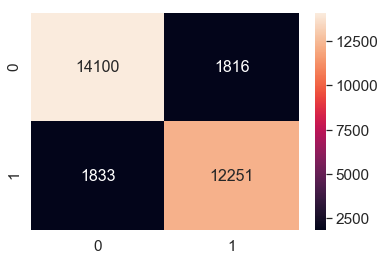

In [41]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [42]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

   Negative       0.88      0.89      0.89     15916
   Positive       0.87      0.87      0.87     14084

avg / total       0.88      0.88      0.88     30000



# Feature importance for BoW

In [43]:
def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [44]:
show_most_informative_features(BoW, clf)

			Positive						Negative
________________________________________________________________________________________________
	-13.1158	worst          				9.3084	perfect        
	-10.7616	aw             				9.1442	delici         
	-10.2469	horribl        				8.8488	hook           
	-9.6490	terribl        				8.4955	excel          
	-9.3599	unfortun       				8.4485	amaz           
	-9.2762	tasteless      				8.3076	skeptic        
	-8.4395	sad            				7.7945	addict         
	-8.3974	disappoint     				7.4624	beat           
	-8.3745	cancel         				7.3647	best           
	-8.3489	return         				7.2386	awesom         
	-8.3343	wors           				7.0659	great          
	-8.2261	yuck           				7.0623	fantast        
	-8.0214	threw          				6.8488	satisfi        
	-7.9818	stale          				6.8295	yum            
	-7.9153	gross          				6.6189	worri          
	-7.6038	unpleas        				6.5349	yummi          
	-7.5881	ruin           				6.5163	smooth         
	-7.542

# RandomizedCVto find best C

In [45]:
cls=LogisticRegression()
param_grid={'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.00001],
           'penalty':['l1','l2']}
tcv=TimeSeriesSplit(n_splits=10)
rcv=RandomizedSearchCV(cls,param_grid,cv=tcv,verbose=1,n_jobs=4)
rcv.fit(X_train,Y_train)
savetofile(rcv,"D:/Applied AI Course/rcv_r")
print("Best HyperParameter: ",rcv.best_params_)
print("Best Accuracy: %.2f%%"%(rcv.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.9min finished


Best HyperParameter:  {'penalty': 'l2', 'C': 10}
Best Accuracy: 86.79%


In [46]:
def plot_error(rcv):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    
    for x in rcv.grid_scores_:
        if (x[0]['penalty'])=='l1':
            y1.append(1-x[1])
            x1.append(x[0]['C'])
        else:
            y2.append(1-x[1])
            x2.append(x[0]['C'])
    
    plt.xlim(1e-4,500)
    plt.ylim(0,1.0)
    plt.xlabel("C",fontsize=15)
    plt.ylabel("Misclassification error")
    plt.title("Misclassification error vs C")
    plt.plot(x1,y1,'b',label="L1")
    plt.plot(x2,y2,'r',label="L2")
    plt.legend()
    plt.show()
    

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


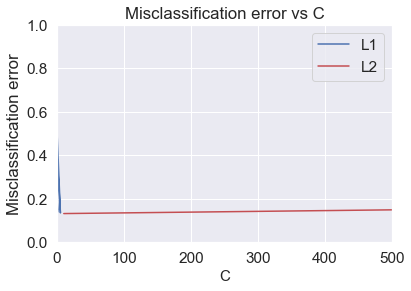

In [47]:
plot_error(rcv)

In [48]:
clf=LogisticRegression(C=5, penalty='l2')
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
training_accuracy = clf.score(X_train, Y_train)
training_error_rcv = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, y_pred)
test_error_rcv = 1 - test_accuracy

Accuracy on test set: 87.837%
Non Zero weights: 44575


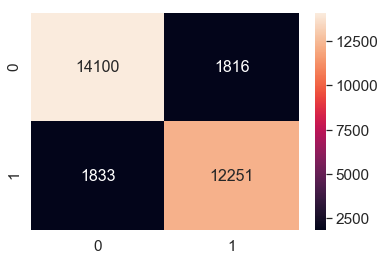

In [49]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [50]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

   Negative       0.88      0.89      0.89     15916
   Positive       0.87      0.87      0.87     14084

avg / total       0.88      0.88      0.88     30000



# Tf-Idf

In [51]:
X=final_d["CleanedText"]
X.shape

(100000,)

In [52]:
y=final_d["Score"]
y.shape

(100000,)

In [53]:
#split the data into train and test fo bag of words

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=None,shuffle=False)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=train_test_split(X_train,Y_train,test_size=0.3,shuffle=False)

In [54]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train)
#X_train=StandardScaler(with_mean=False).fit_transform(X_train)
x_test=tfidf.transform(X_test)

In [55]:
from sklearn import preprocessing
X_train=preprocessing.normalize(X_train)
X_test=preprocessing.normalize(x_test)

print(X_train.shape, X_test.shape)

(70000, 44575) (30000, 44575)


In [56]:
from sklearn.model_selection import TimeSeriesSplit

tcv=TimeSeriesSplit(n_splits=10)
for train,cv in tcv.split(X_train):
    print(X_train[train].shape,X_train[cv].shape)

(6370, 44575) (6363, 44575)
(12733, 44575) (6363, 44575)
(19096, 44575) (6363, 44575)
(25459, 44575) (6363, 44575)
(31822, 44575) (6363, 44575)
(38185, 44575) (6363, 44575)
(44548, 44575) (6363, 44575)
(50911, 44575) (6363, 44575)
(57274, 44575) (6363, 44575)
(63637, 44575) (6363, 44575)


# Choose best hyperparameter using GridSearchCV

In [57]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv_tfidf = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv_tfidf.fit(X_train,Y_train)
savetofile(gsv_tfidf,"D:/Applied AI Course/gsv_tfidf")
print("Best HyperParameter: ",gsv_tfidf.best_params_)
print("Best Accuracy: %.2f%%"%(gsv_tfidf.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  8.6min finished


Best HyperParameter:  {'C': 5, 'penalty': 'l2'}
Best Accuracy: 86.83%


In [58]:
def plot_error_vs_c(gsv):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for a in gsv.grid_scores_:
        if (a[0]['penalty']) =='l1':
            y1.append(1-a[1])
            x1.append(a[0]['C'])
        else:
            y2.append(1-a[1])
            x2.append(a[0]['C'])
    plt.xlim(5,1010)
    plt.ylim(0,0.5)
    plt.xlabel("C",fontsize=15)
    plt.ylabel("Misclassification Error")
    plt.title('Misclassification Error v/s C')
    plt.plot(x1,y1,'b',label="L1")
    plt.plot(x2,y2,'r',label="L2")
    plt.legend()
    plt.show()


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


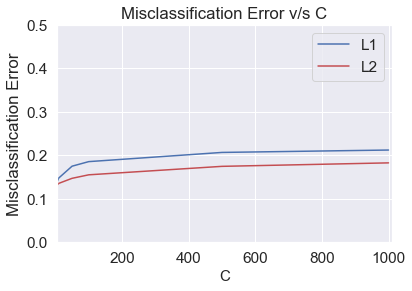

In [59]:
plot_error_vs_c(gsv_tfidf)

# Perturbation Test

In [60]:
clf=LogisticRegression(C=1, penalty='l2')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 87.820%
Non Zero weights: 44575


In [61]:
#weight before adding random noise
from scipy.sparse import find
#Weights before adding random noise
weights1 = find(clf.coef_[0])[2]
print(weights1[:50])

[-0.04053489  0.2185708   0.08413608 -0.00737421  0.11936881 -0.16148735
  0.05783046  0.009498    0.02452192  0.15993298 -0.01273076  0.05084801
  0.03859645  0.11856259  0.07135083 -0.11376825  0.02614606 -0.22853564
 -0.16347983 -0.27108698  0.00448616 -0.002792    0.08604424  0.13908059
 -0.01683189 -0.0409205   0.00366113  0.00597774 -0.03524158 -0.26363743
  0.21006693 -0.07940451 -0.34030893  0.13208726  0.07137482  0.00188177
 -0.12317676  0.07579839 -0.01335047  0.07735175 -0.01547063  0.41274839
 -0.13207432  0.03724167 -0.06100474  1.18437589 -0.06346688  0.03658489
 -0.29789426  0.03045555]


In [62]:
#insert random noise
X_train_t = X_train
#Random noise
z = np.random.uniform(low=-0.0001, high=0.0001, size=(find(X_train_t)[0].size,))
#Getting the postions(row and column) and value of non-zero datapoints 
r,c,v = find(X_train_t)

#Introducing random noise to non-zero datapoints
X_train_t[r,c] = z + X_train_t[r,c]

print(X_train_t.shape)

(70000, 44575)


In [63]:
clf=LogisticRegression(C=1, penalty='l2')
clf.fit(X_train_t, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 87.820%
Non Zero weights: 44575


In [64]:
#weight after adding random noise
from scipy.sparse import find
#Weights before adding random noise
weights2 = find(clf.coef_[0])[2]
print(weights2[:50])

[-0.04054298  0.2184667   0.08406127 -0.00736103  0.11933605 -0.16151016
  0.05780618  0.00947112  0.02449069  0.15992433 -0.01270971  0.05085112
  0.0386192   0.11862801  0.07135979 -0.11380638  0.02610672 -0.22840384
 -0.16346064 -0.27122137  0.00447613 -0.00278868  0.08608755  0.1390681
 -0.01684412 -0.04075514  0.00366312  0.00594582 -0.03520337 -0.26350191
  0.2100048  -0.07931782 -0.34035664  0.13207126  0.07142421  0.00188123
 -0.12322678  0.07583229 -0.01336515  0.07740348 -0.01544947  0.4128175
 -0.13206487  0.0372324  -0.06094933  1.18423037 -0.06344667  0.03656178
 -0.297914    0.03046092]


In [65]:
print(weights2.size)

44575


In [66]:
w_diff=(abs(weights1-weights2) / weights1) * 100

In [67]:
print(w_diff[np.where(w_diff > 30)].size)

8


In [68]:
clf=LogisticRegression(C=1, penalty='l2')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
training_accuracy = clf.score(X_train, Y_train)
training_error_tfidf = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, pred)
test_error_tfidf = 1 - test_accuracy

Accuracy on test set: 87.820%
Non Zero weights: 44575


# Hyperparameter using randomised CV

In [69]:
cls=LogisticRegression()
param_grid={'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.00001],
           'penalty':['l1','l2']}
tcv=TimeSeriesSplit(n_splits=10)
rcv_tfidf=RandomizedSearchCV(cls,param_grid,cv=tcv,verbose=1,n_jobs=4)
rcv_tfidf.fit(X_train,Y_train)
savetofile(rcv_tfidf,"D:/Applied AI Course/rcv_r")
print("Best HyperParameter: ",rcv_tfidf.best_params_)
print("Best Accuracy: %.2f%%"%(rcv_tfidf.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   46.6s finished


Best HyperParameter:  {'penalty': 'l2', 'C': 5}
Best Accuracy: 86.84%


In [70]:
clf=LogisticRegression(C=5, penalty='l2')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
training_accuracy = clf.score(X_train, Y_train)
training_error_tfidf_rcv = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, pred)
test_error_tfidf_rcv = 1 - test_accuracy

Accuracy on test set: 87.683%
Non Zero weights: 44575


# Confusion matrix

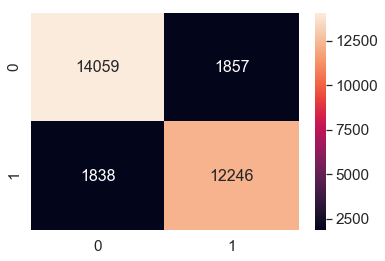

In [71]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [72]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

   Negative       0.88      0.88      0.88     15916
   Positive       0.87      0.87      0.87     14084

avg / total       0.88      0.88      0.88     30000



# Top important features

In [73]:
def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [74]:
show_most_informative_features(tfidf, clf)

			Positive						Negative
________________________________________________________________________________________________
	-12.9842	worst          				12.4592	great          
	-11.0487	disappoint     				11.2878	delici         
	-10.4858	aw             				11.2324	perfect        
	-10.0916	horribl        				10.6257	best           
	-9.7820	unfortun       				9.4445	love           
	-9.6655	terribl        				9.4390	excel          
	-9.1788	return         				8.3835	amaz           
	-8.3176	tasteless      				8.2369	hook           
	-7.7926	sad            				7.7550	skeptic        
	-7.7521	stale          				7.4376	addict         
	-7.7138	wors           				7.3323	favorit        
	-7.6806	threw          				7.3092	nice           
	-7.5973	yuck           				6.9073	good           
	-7.4674	cancel         				6.8757	awesom         
	-7.1924	gross          				6.8705	beat           
	-6.9582	bland          				6.7612	satisfi        
	-6.8500	ruin           				6.6060	fantast        
	-

# Word2Vec

In [75]:
import gensim
from gensim.models import word2vec,KeyedVectors

D:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [76]:
X=final_d["Text"]
X.shape

(100000,)

In [77]:
y=final_d["Score"]
y.shape

(100000,)

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=None, shuffle=False)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=train_test_split(X_train,Y_train,test_size=0.3, shuffle=False)

In [79]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(70000,) (30000,) (70000,) (30000,)


In [80]:
W2V_Tr=openfromfile("D:/Applied AI Course/W2V_Tr")
words=list(W2V_Tr.wv.vocab)
print(len(words))

35046


In [81]:
i=0
list_of_sentence=[]
for sent in X_train.values:
    filtered_sentence=[]
    list_of_sentence.append(sent.split())
    #sent=cleanhtml(sent)
    #for w in sent.split():
      #   for cleaned in cleanpunc(w).split():
      #      if(cleaned.isalpha()):
       #         filtered_sentence.append(cleaned.lower())
        #    else:
         #       continue
#list_of_sentence.append(filtered_sentence)
#print(X["CleanedText"].values[0])
#print('###########')
#print(list_of_sentence[0])
W2V_Tr=gensim.models.Word2Vec(list_of_sentence,min_count=5,size=50,workers=4)
savetofile(W2V_Tr,"D:/Applied AI Course/W2V_Tr")
words=list(W2V_Tr.wv.vocab)
print(len(words))

35096


In [82]:
W2V_Tr.wv.most_similar('like')

D:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('like,', 0.6809192895889282),
 ('like.', 0.6442536115646362),
 ('resemble', 0.5514405369758606),
 ('prefer', 0.5499492883682251),
 ('enjoy', 0.5351779460906982),
 ('okay', 0.5345637798309326),
 ('dislike', 0.5334469079971313),
 ('know,', 0.5277306437492371),
 ('want', 0.526965856552124),
 ('liked', 0.5147050619125366)]

In [83]:
#word2vec for test
i=0
list_of_sentences=[]
for sent in X_test.values:
    filtered_sentences=[]
    list_of_sentences.append(sent.split())
    #sent=cleanhtml(sent)
    #for w in sent.split():
     #   for cleaned in cleanpunc(w).split():
      #      if(cleaned.isalpha()):
       #         filtered_sentence.append(cleaned.lower())
        #    else:
         #       continue
#list_of_sentences.append(filtered_sentence)
#print(X_train.values[0])
#print('###########')
print(list_of_sentences[0])
W2V_test=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=50,workers=4)
savetofile(W2V_test,"D:/Applied AI Course/W2V_test")
words_test=list(W2V_test.wv.vocab)
print(len(words_test))

['Starbucks', 'Caffe', 'Verona', 'is', 'one', 'of', 'the', 'most', 'full-bodied,', 'aromatic', 'coffees', 'sold', 'by', 'Starbucks.', 'It', 'can', 'be', 'enjoyed', 'at', 'any', 'time', 'of', 'day,', 'but', 'it', 'is', 'best', 'served', 'to', 'late-afternoon', 'guests', 'or', 'after', 'dinner', 'with', 'dessert.', 'To', 'anyone', 'familiar', 'with', 'the', 'rich', 'aroma', 'of', 'coffee', 'beans', 'roasting,', 'this', 'coffee', 'tastes', 'like', 'that', 'smell.', 'Few', 'cups', 'are', 'as', 'fraught', 'with', 'flavor', 'and', 'richness', 'as', 'Caffe', 'Verona,', 'short', 'of', 'a', 'well-crafted', 'macchiato.<br', '/><br', '/>In', 'spite', 'of', 'its', 'boldness,', 'this', 'coffee', 'manages', 'to', 'retain', 'its', 'distinctive', 'characteristics.', 'Where', 'some', 'of', 'the', 'darker', 'roasts', 'tend', 'to', 'become', 'uniform', 'and', 'mundane,', 'Caffe', 'Verona', 'is', 'unmistakably', 'unique', 'and', 'memorable.', 'Its', 'flavor', 'and', 'aroma', 'linger', 'long', 'after', 'yo

# Avg W2Vec

In [84]:
from tqdm import tqdm

sent_vectors = [] 
for sent in tqdm(list_of_sentence): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0 # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = W2V_Tr.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
        
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))
    

train_vectors=np.nan_to_num(sent_vectors)

test_vectors = []
for sent in tqdm(list_of_sentences):
    sent_vec = np.zeros(50)
    cnt_words = 0
    for word in sent:
        try:
            vec = W2V_Tr.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    test_vectors.append(sent_vec)
test_vectors = np.nan_to_num(test_vectors)

100%|██████████████████████████████████| 70000/70000 [00:21<00:00, 3276.62it/s]


70000
50


100%|██████████████████████████████████| 30000/30000 [00:09<00:00, 3192.49it/s]


In [85]:
X_train=np.array(train_vectors)
X_test=np.array(test_vectors)

In [86]:
X_train.shape

(70000, 50)

In [87]:
Y_train.shape

(70000,)

In [88]:
tcv=TimeSeriesSplit(n_splits=10)
for train,cv in tcv.split(X_train):
    print(X_train[train].shape,X_train[cv].shape)

(6370, 50) (6363, 50)
(12733, 50) (6363, 50)
(19096, 50) (6363, 50)
(25459, 50) (6363, 50)
(31822, 50) (6363, 50)
(38185, 50) (6363, 50)
(44548, 50) (6363, 50)
(50911, 50) (6363, 50)
(57274, 50) (6363, 50)
(63637, 50) (6363, 50)


# Best hyperparameter using GridSearchCV

In [89]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv_avgw2v = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv_avgw2v.fit(X_train,Y_train)
savetofile(gsv_avgw2v,"D:/Applied AI Course/gsv_avgw2v")
print("Best HyperParameter: ",gsv_avgw2v.best_params_)
print("Best Accuracy: %.2f%%"%(gsv_avgw2v.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 32.4min finished


Best HyperParameter:  {'C': 100, 'penalty': 'l2'}
Best Accuracy: 79.62%


In [90]:
def plot_error_vs_c(gsv):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for a in gsv.grid_scores_:
        if (a[0]['penalty']) =='l1':
            y1.append(1-a[1])
            x1.append(a[0]['C'])
        else:
            y2.append(1-a[1])
            x2.append(a[0]['C'])
    plt.xlim(5,1010)
    plt.ylim(0,0.5)
    plt.xlabel("C",fontsize=15)
    plt.ylabel("Misclassification Error")
    plt.title('Misclassification Error v/s C')
    plt.plot(x1,y1,'b',label="L1")
    plt.plot(x2,y2,'r',label="L2")
    plt.legend()
    plt.show()


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


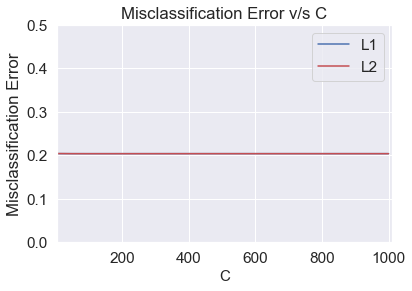

In [91]:
plot_error_vs_c(gsv_avgw2v)

In [92]:
clf=LogisticRegression(C=50, penalty='l1')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
training_accuracy = clf.score(X_train, Y_train)
training_error_avgw2v_gcv = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error_avgw2v_gcv = 1 - test_accuracy

Accuracy on test set: 80.123%
Non Zero weights: 50


# Hyperparameter using RandomizedCV

In [93]:
cls=LogisticRegression()
param_grid={'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.00001],
           'penalty':['l1','l2']}
tcv=TimeSeriesSplit(n_splits=10)
rcv_avgw2v=RandomizedSearchCV(cls,param_grid,cv=tcv,verbose=1,n_jobs=4)
rcv_avgw2v.fit(X_train,Y_train)
savetofile(rcv_avgw2v,"D:/Applied AI Course/rcv_r")
print("Best HyperParameter: ",rcv_avgw2v.best_params_)
print("Best Accuracy: %.2f%%"%(rcv_avgw2v.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 11.6min finished


Best HyperParameter:  {'penalty': 'l2', 'C': 500}
Best Accuracy: 79.62%


In [94]:
clf=LogisticRegression(C=50, penalty='l1')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
training_accuracy = clf.score(X_train, Y_train)
training_error_avgw2v_rcv = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, pred)
test_error_avgw2v_rcv = 1 - test_accuracy

Accuracy on test set: 80.120%
Non Zero weights: 50


# Confusion matrix

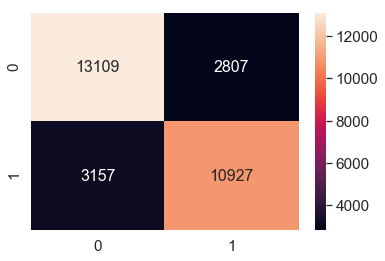

In [95]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [96]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

   Negative       0.88      0.89      0.89     15916
   Positive       0.87      0.87      0.87     14084

avg / total       0.88      0.88      0.88     30000



# Perturbation test 

In [97]:
clf=LogisticRegression(C=1, penalty='l1')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 80.093%
Non Zero weights: 50


In [98]:
#weight before adding random noise
from scipy.sparse import find
#Weights before adding random noise
weights1 = find(clf.coef_[0])[2]
print(weights1[:50])

[ 9.82373167e-01  6.43962983e-01 -1.26942449e-01 -9.21938453e-01
 -2.26221577e+00 -1.32507173e+00  6.76852950e-01 -7.48149239e-01
  7.81987045e-02 -9.06542083e-01 -1.75450614e+00  8.75719895e-02
  1.39020583e-01  4.00644046e-01  2.21260375e+00  1.59206568e+00
  2.31603299e-01 -4.60930123e-01 -1.26046266e+00 -7.81269835e-01
 -4.56897484e-01 -1.15332885e+00  6.84127019e-01 -1.19756987e-01
  7.08440722e-01  3.24579814e+00 -1.71425935e-03 -2.24966718e-01
  9.88270214e-01 -7.37326447e-01 -3.44741991e-01 -1.16730813e+00
  2.70815076e-01  1.27817198e+00 -9.97468943e-01  4.77464681e-01
  8.30178635e-01  8.80155629e-02 -8.77464769e-01 -1.03799156e+00
  1.10995641e+00  9.67191431e-01 -7.60279505e-01 -8.70654208e-01
 -8.96236943e-01  1.60561948e-01  5.98219914e-01 -1.94074678e+00
 -8.26192570e-01 -3.35685280e+00]


In [99]:
#insert random noise
X_train_t = X_train
#Random noise
z = np.random.uniform(low=-0.0001, high=0.0001, size=(find(X_train_t)[0].size,))
#Getting the postions(row and column) and value of non-zero datapoints 
r,c,v = find(X_train_t)

#Introducing random noise to non-zero datapoints
X_train_t[r,c] = z + X_train_t[r,c]

print(X_train_t.shape)

(70000, 50)


In [100]:
clf=LogisticRegression(C=1, penalty='l1')
clf.fit(X_train_t, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 80.090%
Non Zero weights: 50


In [101]:
#weight after adding random noise
from scipy.sparse import find
#Weights before adding random noise
weights2 = find(clf.coef_[0])[2]
print(weights2[:50])

[ 9.81623273e-01  6.43842492e-01 -1.27104135e-01 -9.21182547e-01
 -2.26111782e+00 -1.32487356e+00  6.76752464e-01 -7.47723822e-01
  7.80887342e-02 -9.05746596e-01 -1.75431608e+00  8.74792689e-02
  1.38916536e-01  4.00300118e-01  2.21148655e+00  1.59191481e+00
  2.31061453e-01 -4.60862630e-01 -1.25932429e+00 -7.80854180e-01
 -4.57642131e-01 -1.15277060e+00  6.84037856e-01 -1.19906802e-01
  7.08747755e-01  3.24392174e+00 -1.78637896e-03 -2.25066153e-01
  9.88184847e-01 -7.36971882e-01 -3.44169328e-01 -1.16723087e+00
  2.71264586e-01  1.27827923e+00 -9.97012534e-01  4.77803351e-01
  8.30443335e-01  8.80926059e-02 -8.76747351e-01 -1.03832525e+00
  1.10979316e+00  9.67084711e-01 -7.60567509e-01 -8.70574083e-01
 -8.95985285e-01  1.60280261e-01  5.98190856e-01 -1.93946364e+00
 -8.26070114e-01 -3.35600493e+00]


In [102]:
print(weights2.size)

w_diff=(abs(weights1-weights2) / weights1) * 100

print(w_diff[np.where(w_diff > 30)].size)


50
0


Observations:
  For AvgW2V there are 0 features whose weight is greater than 30 hence there is no multicollinearity

# Weighted TfIdf W2Vec

In [103]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final_d['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [104]:
X=final_d["CleanedText"]
X.shape

(100000,)

In [105]:
y=final_d["Score"]
y.shape

(100000,)

In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=None, shuffle=False)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=train_test_split(X_train,Y_train,test_size=0.3,random_state=None, shuffle=False)

In [107]:
X_train = model.fit_transform(X_train)
X_test = model.transform(X_test)

In [108]:
X_train=preprocessing.normalize(X_train)
X_test=preprocessing.normalize(X_test)

In [109]:
savetofile(model,"D:/Applied AI Course/model")

In [110]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentence): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = W2V_Tr.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
        
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████████████████████████████| 70000/70000 [00:28<00:00, 2469.24it/s]


In [111]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = W2V_Tr.wv[word]
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf    
        except:
            pass
            
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

100%|██████████████████████████████████| 30000/30000 [00:12<00:00, 2408.51it/s]


In [112]:
X_train=np.array(tfidf_sent_vectors)
X_test=np.array(tfidf_sent_vectors_test)

In [113]:
tcv=TimeSeriesSplit(n_splits=10)
for train,cv in tcv.split(X_train):
    print(X_train[train].shape,X_train[cv].shape)

(6370, 50) (6363, 50)
(12733, 50) (6363, 50)
(19096, 50) (6363, 50)
(25459, 50) (6363, 50)
(31822, 50) (6363, 50)
(38185, 50) (6363, 50)
(44548, 50) (6363, 50)
(50911, 50) (6363, 50)
(57274, 50) (6363, 50)
(63637, 50) (6363, 50)


# Hyperparameter selection using GridSearchCV

In [114]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv_tfidfw2v = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv_tfidfw2v.fit(X_train,Y_train)
savetofile(gsv_tfidfw2v,"D:/Applied AI Course/gsv_tfidfw2v")
print("Best HyperParameter: ",gsv_tfidfw2v.best_params_)
print("Best Accuracy: %.2f%%"%(gsv_tfidfw2v.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 12.7min finished


Best HyperParameter:  {'C': 0.5, 'penalty': 'l2'}
Best Accuracy: 71.08%


In [115]:
def plot_error_vs_c(gsv):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for a in gsv.grid_scores_:
        if (a[0]['penalty']) =='l1':
            y1.append(1-a[1])
            x1.append(a[0]['C'])
        else:
            y2.append(1-a[1])
            x2.append(a[0]['C'])
    plt.xlim(5,1010)
    plt.ylim(0,0.5)
    plt.xlabel("C",fontsize=15)
    plt.ylabel("Misclassification Error")
    plt.title('Misclassification Error v/s C')
    plt.plot(x1,y1,'b',label="L1")
    plt.plot(x2,y2,'r',label="L2")
    plt.legend()
    plt.show()

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


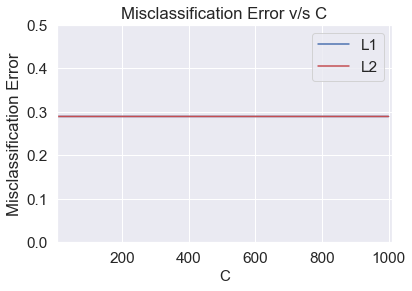

In [116]:
plot_error_vs_c(gsv_tfidfw2v)

In [117]:
clf=LogisticRegression(C=50, penalty='l1')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
training_accuracy = clf.score(X_train, Y_train)
training_error_tfidfw2v_gcv = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, pred)
test_error_tfidfw2v_gcv = 1 - test_accuracy

Accuracy on test set: 71.173%
Non Zero weights: 50


# ConfusionMatrix

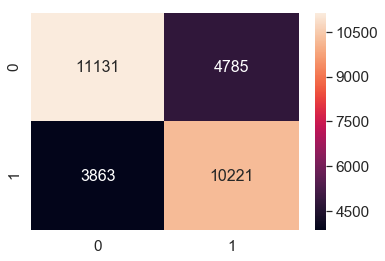

In [118]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [119]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

   Negative       0.88      0.89      0.89     15916
   Positive       0.87      0.87      0.87     14084

avg / total       0.88      0.88      0.88     30000



# RandomizedCV

In [120]:
%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
rcv_tfidfw2v = RandomizedSearchCV(clf,param_grid,cv=tscv,verbose=1)
rcv_tfidfw2v.fit(X_train,Y_train)
savetofile(rcv_tfidfw2v,"D:/Applied AI Course/rcv_tfidfw2v")
print("Best HyperParameter: ",rcv_tfidfw2v.best_params_)
print("Best Accuracy: %.2f%%"%(rcv_tfidfw2v.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished


Best HyperParameter:  {'penalty': 'l2', 'C': 1}
Best Accuracy: 71.07%


In [121]:
def plot_error_vs_c(gsv):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for a in gsv.grid_scores_:
        if (a[0]['penalty']) =='l1':
            y1.append(1-a[1])
            x1.append(a[0]['C'])
        else:
            y2.append(1-a[1])
            x2.append(a[0]['C'])
    plt.xlim(5,1010)
    plt.ylim(0,0.5)
    plt.xlabel("C",fontsize=15)
    plt.ylabel("Misclassification Error")
    plt.title('Misclassification Error v/s C')
    plt.plot(x1,y1,'b',label="L1")
    plt.plot(x2,y2,'r',label="L2")
    plt.legend()
    plt.show()

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


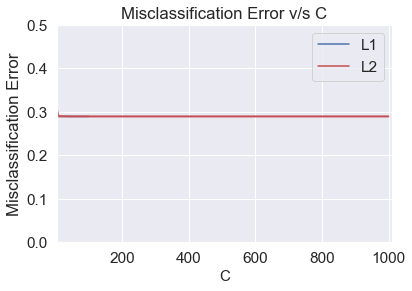

In [122]:
plot_error_vs_c(rcv_tfidfw2v)

In [123]:
clf=LogisticRegression(C=1000, penalty='l1')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
training_accuracy = clf.score(X_train, Y_train)
training_error_tfidfw2v_rcv = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, pred)
test_error_tfidfw2v_rcv = 1 - test_accuracy

Accuracy on test set: 71.170%
Non Zero weights: 50


# Confusion matrix

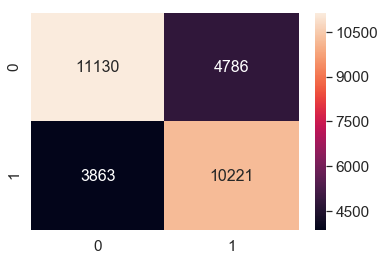

In [124]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [125]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

   Negative       0.74      0.70      0.72     15916
   Positive       0.68      0.73      0.70     14084

avg / total       0.71      0.71      0.71     30000



# Perturbation test 

In [126]:
clf=LogisticRegression(C=50, penalty='l1')
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 71.173%
Non Zero weights: 50


In [127]:
#weight before adding random noise
from scipy.sparse import find
#Weights before adding random noise
weights1 = find(clf.coef_[0])[2]
print(weights1[:50])

[ 0.3922859   0.17647665 -0.31962992 -0.15680467 -0.29118056 -0.75469056
 -0.63037629  0.17852943 -0.07449325  0.52505246 -0.66808791  0.19181855
  0.22607817  0.01190473 -0.17406158  0.90362106 -0.91852076  0.1789419
  0.49139432  0.02384252 -1.02480475  0.1281986   0.27301226 -0.72921535
  0.51335895 -0.81936962 -0.15461104 -0.2241672   0.06173484  0.75018639
  0.58986491 -0.42933448 -0.03441005  0.43158596  0.38491749  0.31304216
  0.29512033  0.07290084  0.00707572 -1.01992877  0.23388793  0.48337678
 -0.59036309 -0.65015303 -0.40407653 -0.34095102  0.11902002 -0.14396864
 -0.52592214 -0.20862359]


In [128]:
#insert random noise
X_train_t = X_train
#Random noise
z = np.random.uniform(low=-0.0001, high=0.0001, size=(find(X_train_t)[0].size,))
#Getting the postions(row and column) and value of non-zero datapoints 
r,c,v = find(X_train_t)

#Introducing random noise to non-zero datapoints
X_train_t[r,c] = z + X_train_t[r,c]

print(X_train_t.shape)

(70000, 50)


In [129]:
clf=LogisticRegression(C=50, penalty='l1')
clf.fit(X_train_t, Y_train)
pred=clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test set: 71.173%
Non Zero weights: 50


In [130]:
#weight after adding random noise
from scipy.sparse import find
#Weights before adding random noise
weights2 = find(clf.coef_[0])[2]
print(weights2[:50])

[ 0.39224849  0.17647089 -0.31969236 -0.15671782 -0.29107267 -0.75474185
 -0.63044625  0.17852163 -0.07452251  0.52519906 -0.66806719  0.19180711
  0.22603546  0.0118319  -0.17418277  0.90360444 -0.91862865  0.178994
  0.49146357  0.02391817 -1.0248276   0.1282408   0.27299366 -0.72933172
  0.51345062 -0.81952417 -0.15461125 -0.2240491   0.06180344  0.75018581
  0.58988674 -0.4293049  -0.03430604  0.43156047  0.38495254  0.31308421
  0.29517333  0.07295862  0.00710917 -1.01998219  0.23385943  0.48340951
 -0.59040188 -0.65014085 -0.40404553 -0.34097297  0.11897915 -0.14387591
 -0.52595078 -0.20852026]


In [131]:
print(weights2.size)

w_diff=(abs(weights1-weights2) / weights1) * 100

print(w_diff[np.where(w_diff > 30)].size)

50
0


Conclusion:  0 features have their weights less thank 30

# Summary

In [134]:
from prettytable import PrettyTable

pr=PrettyTable()
tr=np.round(training_error,3)
te=np.round(test_error,3)
tr1=np.round(training_error_rcv,3)
te1=np.round(test_error_rcv,3)
tr2=np.round(training_error_tfidf, 3)
te2=np.round(test_error_tfidf, 3)
tr3=np.round(training_error_tfidf_rcv, 3)
te3=np.round(test_error_tfidf_rcv, 3)
tr4=np.round(training_error_avgw2v_gcv, 3)
te4=np.round(test_error_avgw2v_gcv, 3)
tr5=np.round(training_error_avgw2v_rcv, 3)
te5=np.round(test_error_avgw2v_rcv, 3)
tr6=np.round(training_error_tfidfw2v_gcv, 3)
te6=np.round(test_error_tfidfw2v_gcv, 3)
tr7=np.round(training_error_tfidfw2v_rcv, 3)
te7=np.round(test_error_tfidfw2v_rcv, 3)
#tr1=np.round(training_error_tf,2)
#te1=np.round(test_error_tf,2)
pr.field_names=["Model", "Hyperparameter(Alpha)", "Train error"," Test Error"]
pr.add_row(["BoW",gcv.best_params_,tr,te])
pr.add_row(["BoW",rcv.best_params_,tr1,te1])
pr.add_row(["Tfidf",gsv_tfidf.best_params_,tr2,te2])
pr.add_row(["Tfidf",rcv_tfidf.best_params_,tr3,te3])
pr.add_row(["AvgW2Vec",gsv_avgw2v.best_params_,tr4,te4])
pr.add_row(["AvgW2Vec",rcv_avgw2v.best_params_,tr5,te5])
pr.add_row(["TfidfW2Vec",gsv_tfidfw2v.best_params_,tr6,te6])
pr.add_row(["TfidfW2Vec",rcv_tfidfw2v.best_params_,tr7,te7])


#pr.add_row(["TFIDF",hyp2,tr1,te1])
#pr.add_row(["(Bernoulli Tfidf)",btf_optimal_alpha,np.round(training_error_tfidf,3),np.round(test_error_tfidf,3)])
#pr.add_row(["AvgWord2Vec",aw2v_optimal_alpha,np.round(training_error_aw2v,3),np.round(test_error_aw2v,3)])
#pr.add_row(["Weighted TFIDF Word2Vec",tfw2v_optimal_alpha,np.round(training_error_tfw2v,3),np.round(test_error_tfw2v,3)])
print(pr)

+------------+-----------------------------+-------------+-------------+
|   Model    |    Hyperparameter(Alpha)    | Train error |  Test Error |
+------------+-----------------------------+-------------+-------------+
|    BoW     |  {'C': 5, 'penalty': 'l2'}  |    0.094    |    0.122    |
|    BoW     |  {'penalty': 'l2', 'C': 10} |    0.094    |    0.122    |
|   Tfidf    |  {'C': 5, 'penalty': 'l2'}  |    0.098    |    0.122    |
|   Tfidf    |  {'penalty': 'l2', 'C': 5}  |    0.077    |    0.123    |
|  AvgW2Vec  | {'C': 100, 'penalty': 'l2'} |    0.202    |    0.153    |
|  AvgW2Vec  | {'penalty': 'l2', 'C': 500} |    0.202    |    0.199    |
| TfidfW2Vec | {'C': 0.5, 'penalty': 'l2'} |    0.282    |    0.288    |
| TfidfW2Vec |  {'penalty': 'l2', 'C': 1}  |    0.282    |    0.288    |
+------------+-----------------------------+-------------+-------------+
